In [69]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt

In [141]:
file = open("timepie.log","r")
normalized_lines = list()
for line in file.readlines():
    line_without_time, human_time = line.split("[")
    human_time = human_time[:-2]
    words = line_without_time.split(" ")
    timestamp = int(words[0])
    tags = words[1:]
    # Rather than keep them in roughly the format given, I'm going to normalize so that each tag get's its own line
    for tag in tags:
        if tag:
            normalized_lines.append((timestamp, tag, human_time))
        
df = pandas.DataFrame.from_records(normalized_lines, columns=['timestamp', 'tag', 'human_time'])
df.human_time = pandas.to_datetime(df.human_time)
print(df.head())
# print(df.tail())

    timestamp         tag          human_time
0  1513778226      social 2017-12-20 13:57:06
1  1513778226    endorsed 2017-12-20 13:57:06
2  1513778780  unendorsed 2017-12-20 14:06:20
3  1513779145    endorsed 2017-12-20 14:12:25
4  1513779145  schoolwork 2017-12-20 14:12:25


Of all tags where I knew if I endorsed the activity, 73.7018425461% of the tags were endorsed.


Text(0,0.5,'Fraction of Timestamps')

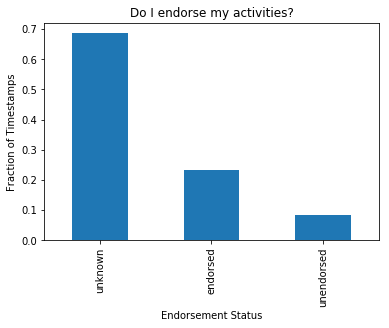

In [142]:
# How much of the time am I doing endorsed things?
# -> A bit, but I mostly don't tag it.
num_endorsed_tags = sum(df.tag == 'endorsed')
num_unendorsed_tasg = sum(df.tag == 'unendorsed')
print("Of all tags where I knew if I endorsed the activity, " 
      + str(num_endorsed_tags / (num_endorsed_tags + num_unendorsed_tasg) * 100)
      + "% of the tags were endorsed.")

# That seems high but we did ignore the tags that had neither.

tags_grouped_by_timestamp = df.groupby(by='timestamp')

def is_timestamp_endorsed(tags):
    if 'endorsed' in tags.tolist():
        return('endorsed')
    elif 'unendorsed' in tags.tolist():
        return('unendorsed')
    else:
        return('unknown')

timestamp_endorsed = tags_grouped_by_timestamp.tag.agg(is_timestamp_endorsed)
endorsement_counts = timestamp_endorsed.value_counts()
endorsement_fracs = endorsement_counts / sum(endorsement_counts)
endorsement_fracs.plot.bar()
plt.title("Do I endorse my activities?")
plt.xlabel("Endorsement Status")
plt.ylabel("Fraction of Timestamps")

/home/skinnersboxy/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(0, 10)

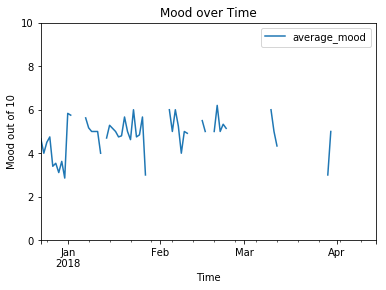

In [223]:
# How happy was I?
# -> Overall I'm missing a lot of data. You can see where I get really depressed when my family was around in Dec 2017.
mood_tags = df[df.tag.str.contains("[0-9]+")]
mood_tags.tag = mood_tags.tag.apply(pandas.to_numeric)
daily_average_mood = mood_tags.groupby(pandas.Grouper(key='human_time', freq='D')).tag.mean()

daily_average_mood = pandas.DataFrame({'datetime': daily_average_mood.index, 'average_mood': daily_average_mood.values})

daily_average_mood.plot(x='datetime', y='average_mood')
plt.xlabel("Time")
plt.ylabel("Mood out of 10")
plt.title("Mood over Time")
plt.ylim(0,10)

In [1]:
special_tags = ['endorsed', 'unendorsed', 'OFF']
mood_tags = list(range(11))
mood_tags = [str(x) for x in mood_tags]
special_tags.extend(mood_tags)
print(",".join(special_tags))

endorsed,unendorsed,OFF,0,1,2,3,4,5,6,7,8,9,10


Text(0,0.5,'Count')

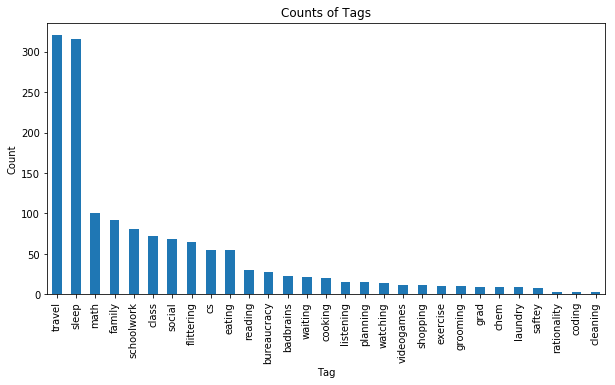

In [270]:
category_tags = df.loc[df.tag.map(lambda x: x not in special_tags),:]
tag_counts = category_tags.groupby(by='tag').count().timestamp
tag_counts = tag_counts.sort_values(ascending=False)
tag_counts.plot.bar(figsize=(10,5))
plt.title("Counts of Tags")
plt.xlabel("Tag")
plt.ylabel("Count")